### Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
import os
import shutil
import tensorflow
import random

### Dataset yang digunakan "Painting Vs Photograph Classification Dataset"

In [2]:
root_path = r'C:\Users\ASUS\Documents\PRAKTIKUM sem 5\KB\Dataset PA'
source_path = os.path.join(root_path, 'Raw Data')

dataset_info = {}
for label in os.listdir(source_path):
    dataset_info[label] = [file for file in os.listdir(os.path.join(source_path, label))]

### Info dari dataset

In [3]:
print(
    f'Jumlah data\t\t\t: {sum([len(files) for files in dataset_info.values()])}',
    f'Jumlah kelas\t\t\t: {len(dataset_info.keys())}',
    sep = '\n' + '-'*60 + '\n'
)

print('-'*60)

for key, value in dataset_info.items():
    print(f'Jumlah data dari kelas {key.lower()}\t: {len(value)}')
    print('-'*60)

Jumlah data			: 5108
------------------------------------------------------------
Jumlah kelas			: 2
------------------------------------------------------------
Jumlah data dari kelas painting	: 1361
------------------------------------------------------------
Jumlah data dari kelas photos	: 3747
------------------------------------------------------------


### Data Visualization
#### Grafik Batang

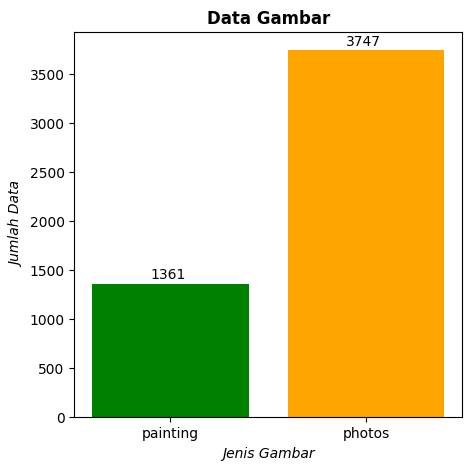

In [4]:
plt.figure(figsize = (5,5))
plt.title('Data Gambar', fontweight='bold')
plt.xlabel('Jenis Gambar', fontstyle='oblique')
plt.ylabel('Jumlah Data', fontstyle='oblique')
plt.bar(dataset_info.keys(),
        [len(files) for files in dataset_info.values()],
        color=['green', 'orange'])

for index, value in enumerate([len(files) for files in dataset_info.values()]):
    plt.text(index - .1, value + 50, str(value))

plt.show()

### Menampilkan Sample Gambar

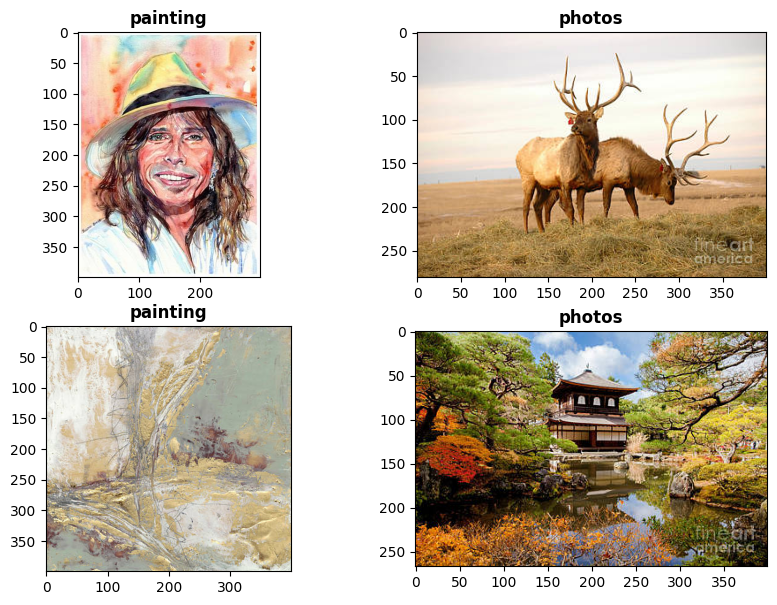

In [5]:
fig = plt.figure(figsize = (10, 7))

image_position = 0

for j in range(2):
    for index, folder in enumerate(dataset_info.keys()):
        image_position += 1
        fig.add_subplot(2, 2, image_position)
        plt.title(folder, fontweight='bold')
        plt.imshow(img.imread(os.path.join(source_path, folder, dataset_info[folder][random.randint(0,1000)])))

### Split Dataset

In [6]:
target_path = os.path.join(root_path, 'Splitted_Raw_Data')

In [7]:
if (os.path.isdir(os.path.join(target_path, 'train'))):
    print(f'path {os.path.join(target_path, "train")} already exists')
else:
    os.makedirs(os.path.join(target_path, 'train'))
    for label in dataset_info.keys():
        os.makedirs(os.path.join(target_path, f'train/{label}'))

if (os.path.isdir(os.path.join(target_path, 'val'))):
    print(f'path {os.path.join(target_path, "val")} already exists')
else:
    os.makedirs(os.path.join(target_path, 'val'))
    for label in dataset_info.keys():
        os.makedirs(os.path.join(target_path, f'val/{label}'))

if (os.path.isdir(os.path.join(target_path, 'test'))):
    print(f'path {os.path.join(target_path, "test")} already exists')
else:
    os.makedirs(os.path.join(target_path, 'test'))
    for label in dataset_info.keys():
        os.makedirs(os.path.join(target_path, f'test/{label}'))

path C:\Users\ASUS\Documents\PRAKTIKUM sem 5\KB\Dataset PA\Splitted_Raw_Data\train already exists
path C:\Users\ASUS\Documents\PRAKTIKUM sem 5\KB\Dataset PA\Splitted_Raw_Data\val already exists
path C:\Users\ASUS\Documents\PRAKTIKUM sem 5\KB\Dataset PA\Splitted_Raw_Data\test already exists


### Data Train : 80% 
### Data Validation : 10% 
### Data Test : 10%

In [8]:
# Shuffle file
for label in dataset_info.keys():
    dataset_info[label] = random.sample(dataset_info[label], len(dataset_info[label]))

file_train = {}; file_val = {}; file_test = {}

for label in dataset_info.keys():
    file_train[label] = dataset_info[label][-1022:]
    file_val[label] = dataset_info[label][-510:]
    file_test[label] = dataset_info[label][-510:]

In [9]:
for label in file_train.keys():
    for data in file_train[label]:
        shutil.copyfile(
            os.path.join(source_path, label, data),
            os.path.join(target_path, f'train/{label}', data)
        )

    for data in file_val[label]:
        shutil.copyfile(
            os.path.join(source_path, label, data),
            os.path.join(target_path, f'val/{label}', data)
        )

    for data in file_test[label]:
        shutil.copyfile(
            os.path.join(source_path, label, data),
            os.path.join(target_path, f'test/{label}', data)
        )